# Face Mask Segmentation


##Objective
To build a Face Mask Segmentation model including a face detector to locate the position of a face in an image

## Data Description
WIDER FACE dataset is a Face Mask Segmentation benchmark dataset, of which
images are selected from the publicly available WIDER dataset.
This data have 32,203 images and 393,703 faces are labeled with a high degree of
variability in scale, pose and occlusion as depicted in the sample images.
In this project, we are using 409 images and around 1000 faces for ease of
computation

## Procedure
We will perform transfer learning on the MobileNet model which is
already trained to perform image segmentation. We will need to train the last 6-7 layers and freeze the remaining layers to train the model for face mask
segmentation. To be able to train the MobileNet model for face mask
segmentation, we utilize the WIDER FACE dataset for various images with a
single face and multiple faces. The output of the model is the face mask
segmented data which masks the face in an image. We learn to build a face mask
segmentation model using Keras supported by Tensorflow





## Dataset
Faces in images marked with bounding boxes have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google Drive


In [ ]:
import tensorflow 

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Load the "images.npy" file




- This file contains images with details of bounding boxes

In [ ]:
import numpy as np

path = '/content/drive/My Drive/'
data = np.load(path + 'images.npy',allow_pickle=True)

### Check one sample from the loaded "images.npy" file  

 

In [ ]:
print (data[408][1])
 

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.3201219512195122, 'y': 0.2839756592292089}, {'x': 0.4009146341463415, 'y': 0.4198782961460446}], 'imageWidth': 656, 'imageHeight': 493}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.4557926829268293, 'y': 0.38742393509127787}, {'x': 0.5442073170731707, 'y': 0.5618661257606491}], 'imageWidth': 656, 'imageHeight': 493}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.6707317073170732, 'y': 0.38336713995943206}, {'x': 0.7134146341463414, 'y': 0.4746450304259635}], 'imageWidth': 656, 'imageHeight': 493}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.16615853658536586, 'y': 0.4665314401622718}, {'x': 0.22560975609756098, 'y': 0.563894523326572}], 'imageWidth': 656, 'imageHeight': 493}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.07164634146341463, 'y': 0.539553752535497}, {'x': 0.11280487804878049, 'y': 0.5862068965517241}], 'imageWidth': 656, 'imageHeight': 493}, {'label': ['Face'], 'notes': '', 'points': [{'x': 

### Set image dimensions   
- Initialize image height, image width with value: 224 

In [ ]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Split the data into training and testing 

---


- 400 images in training
- 9 images in testing data

Training data

In [ ]:
X_train = X[:400]  
y_train = masks[:400]
print(X_train.shape)
print(y_train.shape)

(400, 224, 224, 3)
(400, 224, 224)


Testing data

In [ ]:
X_test = X[400:]
y_test = masks[400:]
print(X_test.shape)
print(y_test.shape)

(9, 224, 224, 3)
(9, 224, 224)


### Print a sample training image, image array and its mask 

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.45882356  0.47450984  0.57647061]
  [ 0.45882356  0.47450984  0.57647061]
  [ 0.47450984  0.49019611  0.59215689]
  ...
  [-0.72549021 -0.49803919 -0.16862744]
  [-0.75686276 -0.48235291 -0.30196077]
  [-0.74117649 -0.47450978 -0.27843136]]

 [[ 0.49803925  0.52941179  0.62352943]
  [ 0.49803925  0.52941179  0.62352943]
  [ 0.52941179  0.56078434  0.65490198]
  ...
  [-0.74901962 -0.52156866 -0.21568626]
  [-0.65490198 -0.38823527 -0.17647058]
  [-0.67058825 -0.40392154 -0.18431371]]

 [[ 0.44313729  0.47450984  0.56862748]
  [ 0.36470592  0.39607847  0.49019611]
  [ 0.41960788  0.45098042  0.54509807]
  ...
  [-0.65490198 -0.41960782 -0.13725489]
  [-0.84313726 -0.58431375 -0.32549018]
  [-0.85882354 -0.60000002 -0.34117645]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [

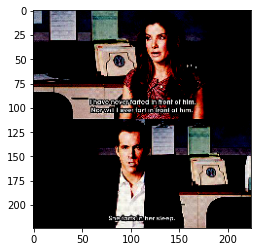

In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
n = 5
print(X_train[n])
pyplot.imshow(X_train[n])

Print the mask

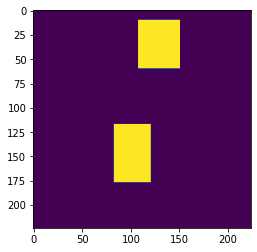

In [ ]:
pyplot.imshow(y_train[n])

## Create the model 
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block0 = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block2])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block1])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block0]) 
    print(x.shape)
    x = UpSampling2D()(x)
    print(x.shape)


    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_WIDTH,IMAGE_HEIGHT))(x)
    print(x.shape)

    return Model(inputs=model.input, outputs=x)    

### Call the create_model function 
- Give trainable=False as argument, we can freeze lower layers for fast training (but low accuracy)

In [ ]:
model = create_model()

(None, 14, 14, 1536)
(None, 28, 28, 1792)
(None, 56, 56, 1920)
(None, 112, 112, 1984)
(None, 224, 224, 1984)
(None, 224, 224)


### Print model summary 

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

### Define dice coefficient function 
- Create a function to calculate dice coefficient


In [ ]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def dice_coeff(y_pred,y_true):
    numerator = 2 * tensorflow.reduce_sum(y_pred*y_true)
    denominator = tensorflow.reduce_sum(y_pred+y_true)
    return numerator/(denominator + epsilon())

### Define loss function

In [ ]:
def loss(y_pred, y_true):
    return binary_crossentropy(y_pred, y_true) - tensorflow.keras.backend.log(dice_coeff(y_pred, y_true) + tensorflow.keras.backend.epsilon())

### Compile the model 
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [ ]:
model = create_model(False)
model.summary()
model.compile(loss = loss, optimizer = 'Adam', metrics = [dice_coeff])

(None, 14, 14, 1536)
(None, 28, 28, 1792)
(None, 56, 56, 1920)
(None, 112, 112, 1984)
(None, 224, 224, 1984)
(None, 224, 224)
Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128    

### Define callbacks 
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model 
- Fit the model using below parameters
  - epochs: 5
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [ ]:
model.fit(X_train,y_train,epochs = 5,verbose=1,batch_size=1,callbacks=[checkpoint,reduce_lr,stop])

Epoch 1/5
399/400 [============================>.] - ETA: 0s - loss: 1.1642 - dice_coeff: 0.4874
Epoch 00001: loss improved from inf to 1.16697, saving model to model-1.17.h5
400/400 [==============================] - 10s 24ms/step - loss: 1.1670 - dice_coeff: 0.4867
Epoch 2/5
398/400 [============================>.] - ETA: 0s - loss: 0.8830 - dice_coeff: 0.5830
Epoch 00002: loss improved from 1.16697 to 0.88075, saving model to model-0.88.h5
400/400 [==============================] - 10s 24ms/step - loss: 0.8807 - dice_coeff: 0.5839
Epoch 3/5
399/400 [============================>.] - ETA: 0s - loss: 0.8214 - dice_coeff: 0.6020
Epoch 00003: loss improved from 0.88075 to 0.82134, saving model to model-0.82.h5
400/400 [==============================] - 10s 24ms/step - loss: 0.8213 - dice_coeff: 0.6016
Epoch 4/5
400/400 [==============================] - ETA: 0s - loss: 0.7974 - dice_coeff: 0.6105
Epoch 00004: loss improved from 0.82134 to 0.79743, saving model to model-0.80.h5
400/400 [

### Get the predicted mask for a test image   

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


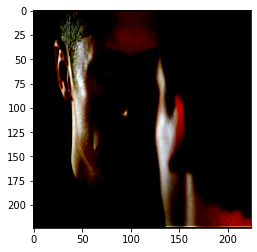

In [ ]:
m=4
plt.imshow(X_test[m])
plt.show()

Show original mask for test image

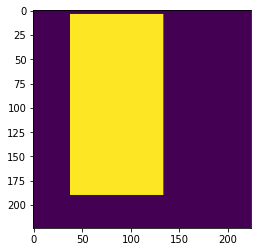

In [ ]:
plt.imshow(y_test[m])
plt.show()

Predict the mask on the test image

In [ ]:
pred_mask = cv2.resize(1.0 * (model.predict(x = np.array([X_test[m]]))[0]>0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

### Impose the mask on the test image 
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


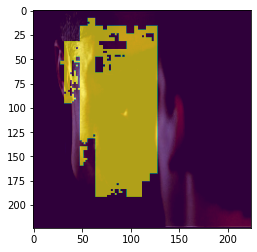

In [ ]:
plt.imshow(X_test[m])
plt.imshow(pred_mask,alpha=0.7)

## **Summary**
1. In this project we are using MobileNet as the pre trained base architecture
2. Using transfer learning and training 5 layers of U Net architecture we predict the face mask on test images
3.  Our model for face mask detection has an accuracy of ~61% with 5 epochs